# Submission type changes (e.g., online submission) before and after COVID

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/jenny/remote_learning_code_Spring_2017-2020')
from utils import parse_args

sys.argv = ['-f']
args = parse_args()

term_20 = args.semester_2020_Spring
start_date_20 = args.start_date_2020_Spring
remote_date_20 = args.remote_date_2020_Spring
end_date_20 = args.end_date_2020_Spring

term_19 = args.semester_2019_Spring
start_date_19 = args.start_date_2019_Spring
cutoff_date_19 = args.cutoff_date_2019_Spring
end_date_19 = args.end_date_2019_Spring

term_18 = args.semester_2018_Spring
start_date_18 = args.start_date_2018_Spring
cutoff_date_18 = args.cutoff_date_2018_Spring
end_date_18 = args.end_date_2018_Spring

term_17 = args.semester_2017_Spring
start_date_17 = args.start_date_2017_Spring
cutoff_date_17 = args.cutoff_date_2017_Spring
end_date_17 = args.end_date_2017_Spring

In [2]:
def submission_type(start_date, remote_date, end_date):
    # load submissions
    submission = pd.read_csv(args.submissions, sep='\t', header=0)
    submission = submission.loc[submission['graded_at'].notnull(), ['assignment_id', 'submitted_at', 'submission_type']] # no duplicate exists
    submission = submission.loc[submission['submitted_at'].notnull()]
    #submission['submitted_at'] = pd.to_datetime(submission['submitted_at'], format='%Y-%m-%d %H:%M:%S.%f')
    submission['submitted_at'] = submission['submitted_at'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S.%f'))
    submission_before = submission.loc[(submission['submitted_at'] < remote_date)&(submission['submitted_at'] >= start_date)]
    types_before = submission_before.loc[:, ['submission_type']].groupby('submission_type').size()
    types_before = types_before / np.sum(types_before.tolist())
    print(types_before)
    submission_after = submission.loc[(submission['submitted_at'] >= remote_date)&(submission['submitted_at'] <= end_date)]
    types_after = submission_after.loc[:, ['submission_type']].groupby('submission_type').size()
    types_after = types_after / np.sum(types_after.tolist())
    print(types_after)
    type_names = types_after.index
    #print(type_names)
    return types_before, types_after, type_names

types_before_20, types_after_20, type_names_20 = submission_type(start_date_20, remote_date_20, end_date_20)
types_before_19, types_after_19, type_names_19 = submission_type(start_date_19, cutoff_date_19, end_date_19)
types_before_18, types_after_18, type_names_18 = submission_type(start_date_18, cutoff_date_18, end_date_18)
types_before_17, types_after_17, type_names_17 = submission_type(start_date_17, cutoff_date_17, end_date_17)

submission_type
basic_lti_launch     0.070266
discussion_topic     0.066021
external_tool        0.029725
media_recording      0.000380
online_quiz          0.257627
online_text_entry    0.082332
online_upload        0.484073
online_url           0.009576
dtype: float64
submission_type
basic_lti_launch     0.003664
discussion_topic     0.038305
external_tool        0.021878
media_recording      0.000840
online_quiz          0.366397
online_text_entry    0.056671
online_upload        0.503868
online_url           0.008377
dtype: float64
submission_type
basic_lti_launch     0.093467
discussion_topic     0.055572
external_tool        0.003020
media_recording      0.000437
online_quiz          0.248545
online_text_entry    0.093060
online_upload        0.492820
online_url           0.013080
dtype: float64
submission_type
basic_lti_launch     0.007828
discussion_topic     0.051338
external_tool        0.000747
media_recording      0.000953
online_quiz          0.209636
online_text_entry    

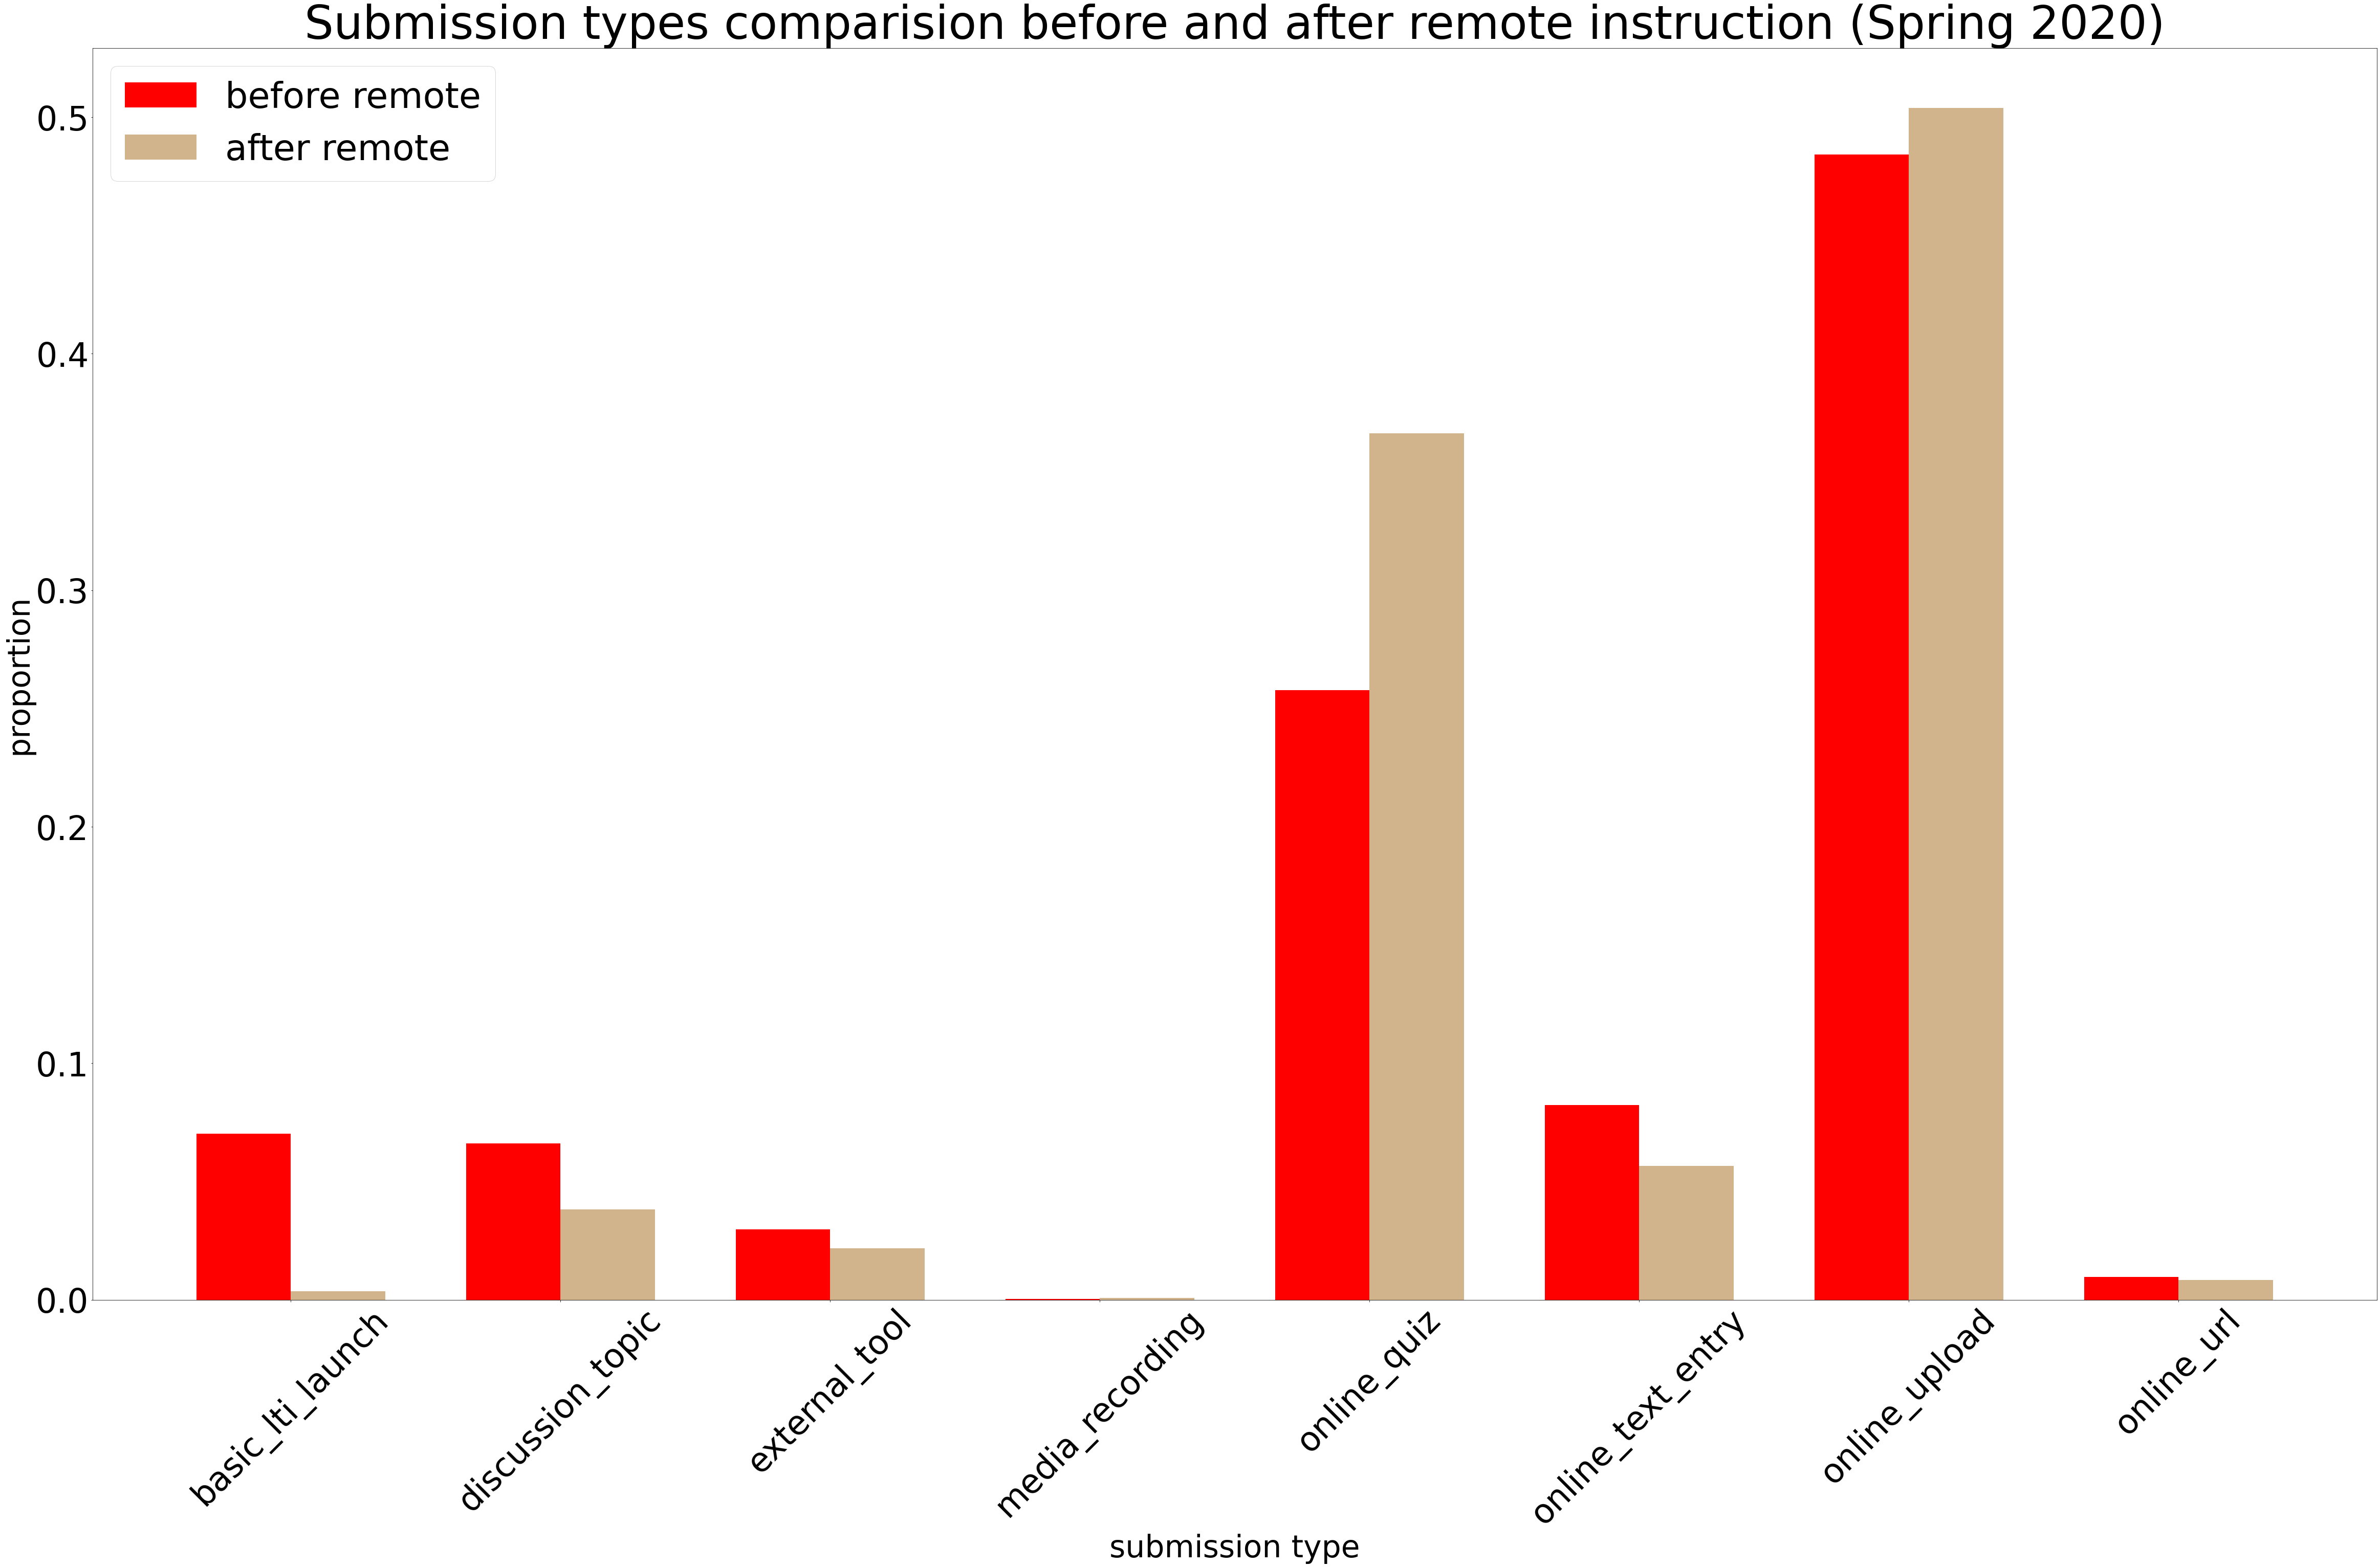

In [4]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
x = np.arange(len(types_before_20))  # the label locations
width = 0.35  # the width of the bars
before = ax.bar(x - width/2, types_before_20.tolist(), width, label='before remote', color='red')
rects2 = ax.bar(x + width/2, types_after_20.tolist(), width, label='after remote', color='tan')
ax.legend(prop={'size': 10})
ax.set_xticks(x)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 80
fig_size[1] = 45
ax.set_xticklabels(list(type_names_20))
plt.xticks(rotation=45, fontsize=65)
plt.yticks(fontsize=65)
plt.title('Submission types comparision before and after remote instruction (Spring 2020)', fontsize=90)
plt.xlabel('submission type', fontsize=60)
plt.ylabel('proportion', fontsize=60)
plt.legend(prop={'size': 70})
plt.show()

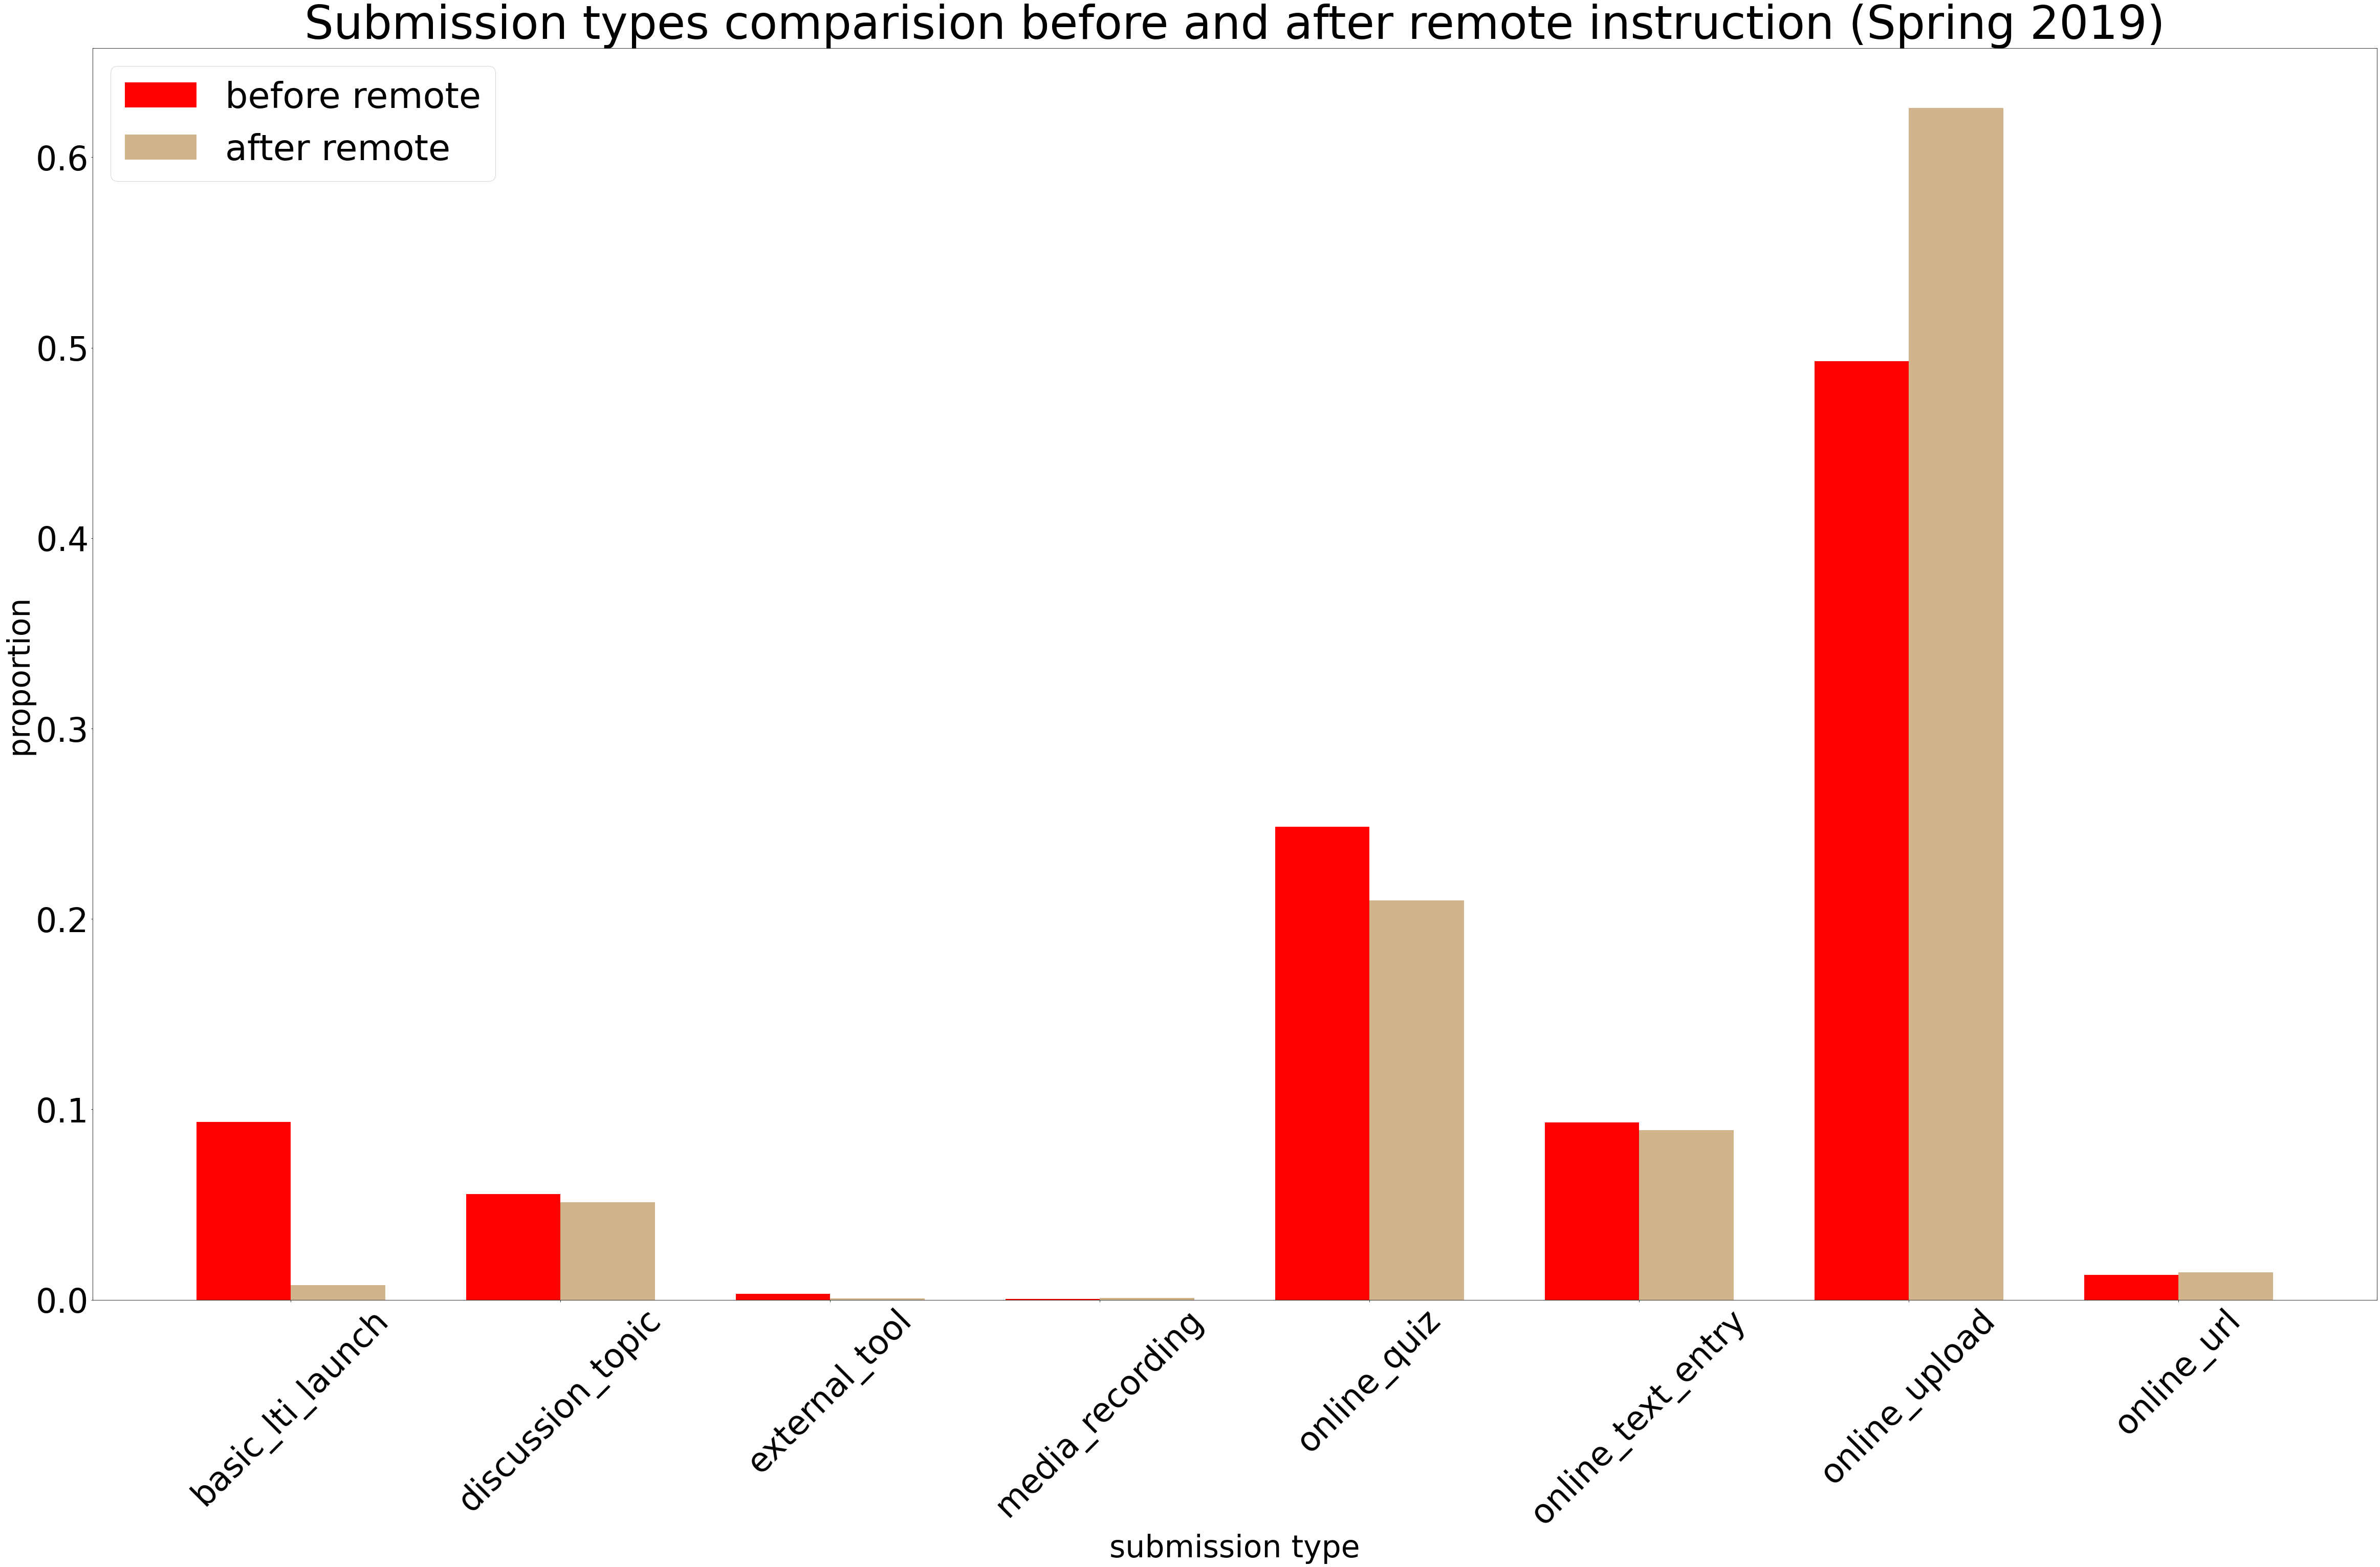

In [5]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
x = np.arange(len(types_before_19))  # the label locations
width = 0.35  # the width of the bars
before = ax.bar(x - width/2, types_before_19.tolist(), width, label='before remote', color='red')
rects2 = ax.bar(x + width/2, types_after_19.tolist(), width, label='after remote', color='tan')
ax.legend(prop={'size': 10})
ax.set_xticks(x)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 80
fig_size[1] = 45
ax.set_xticklabels(list(type_names_19))
plt.xticks(rotation=45, fontsize=65)
plt.yticks(fontsize=65)
plt.title('Submission types comparision before and after remote instruction (Spring 2019)', fontsize=90)
plt.xlabel('submission type', fontsize=60)
plt.ylabel('proportion', fontsize=60)
plt.legend(prop={'size': 70})
plt.show()

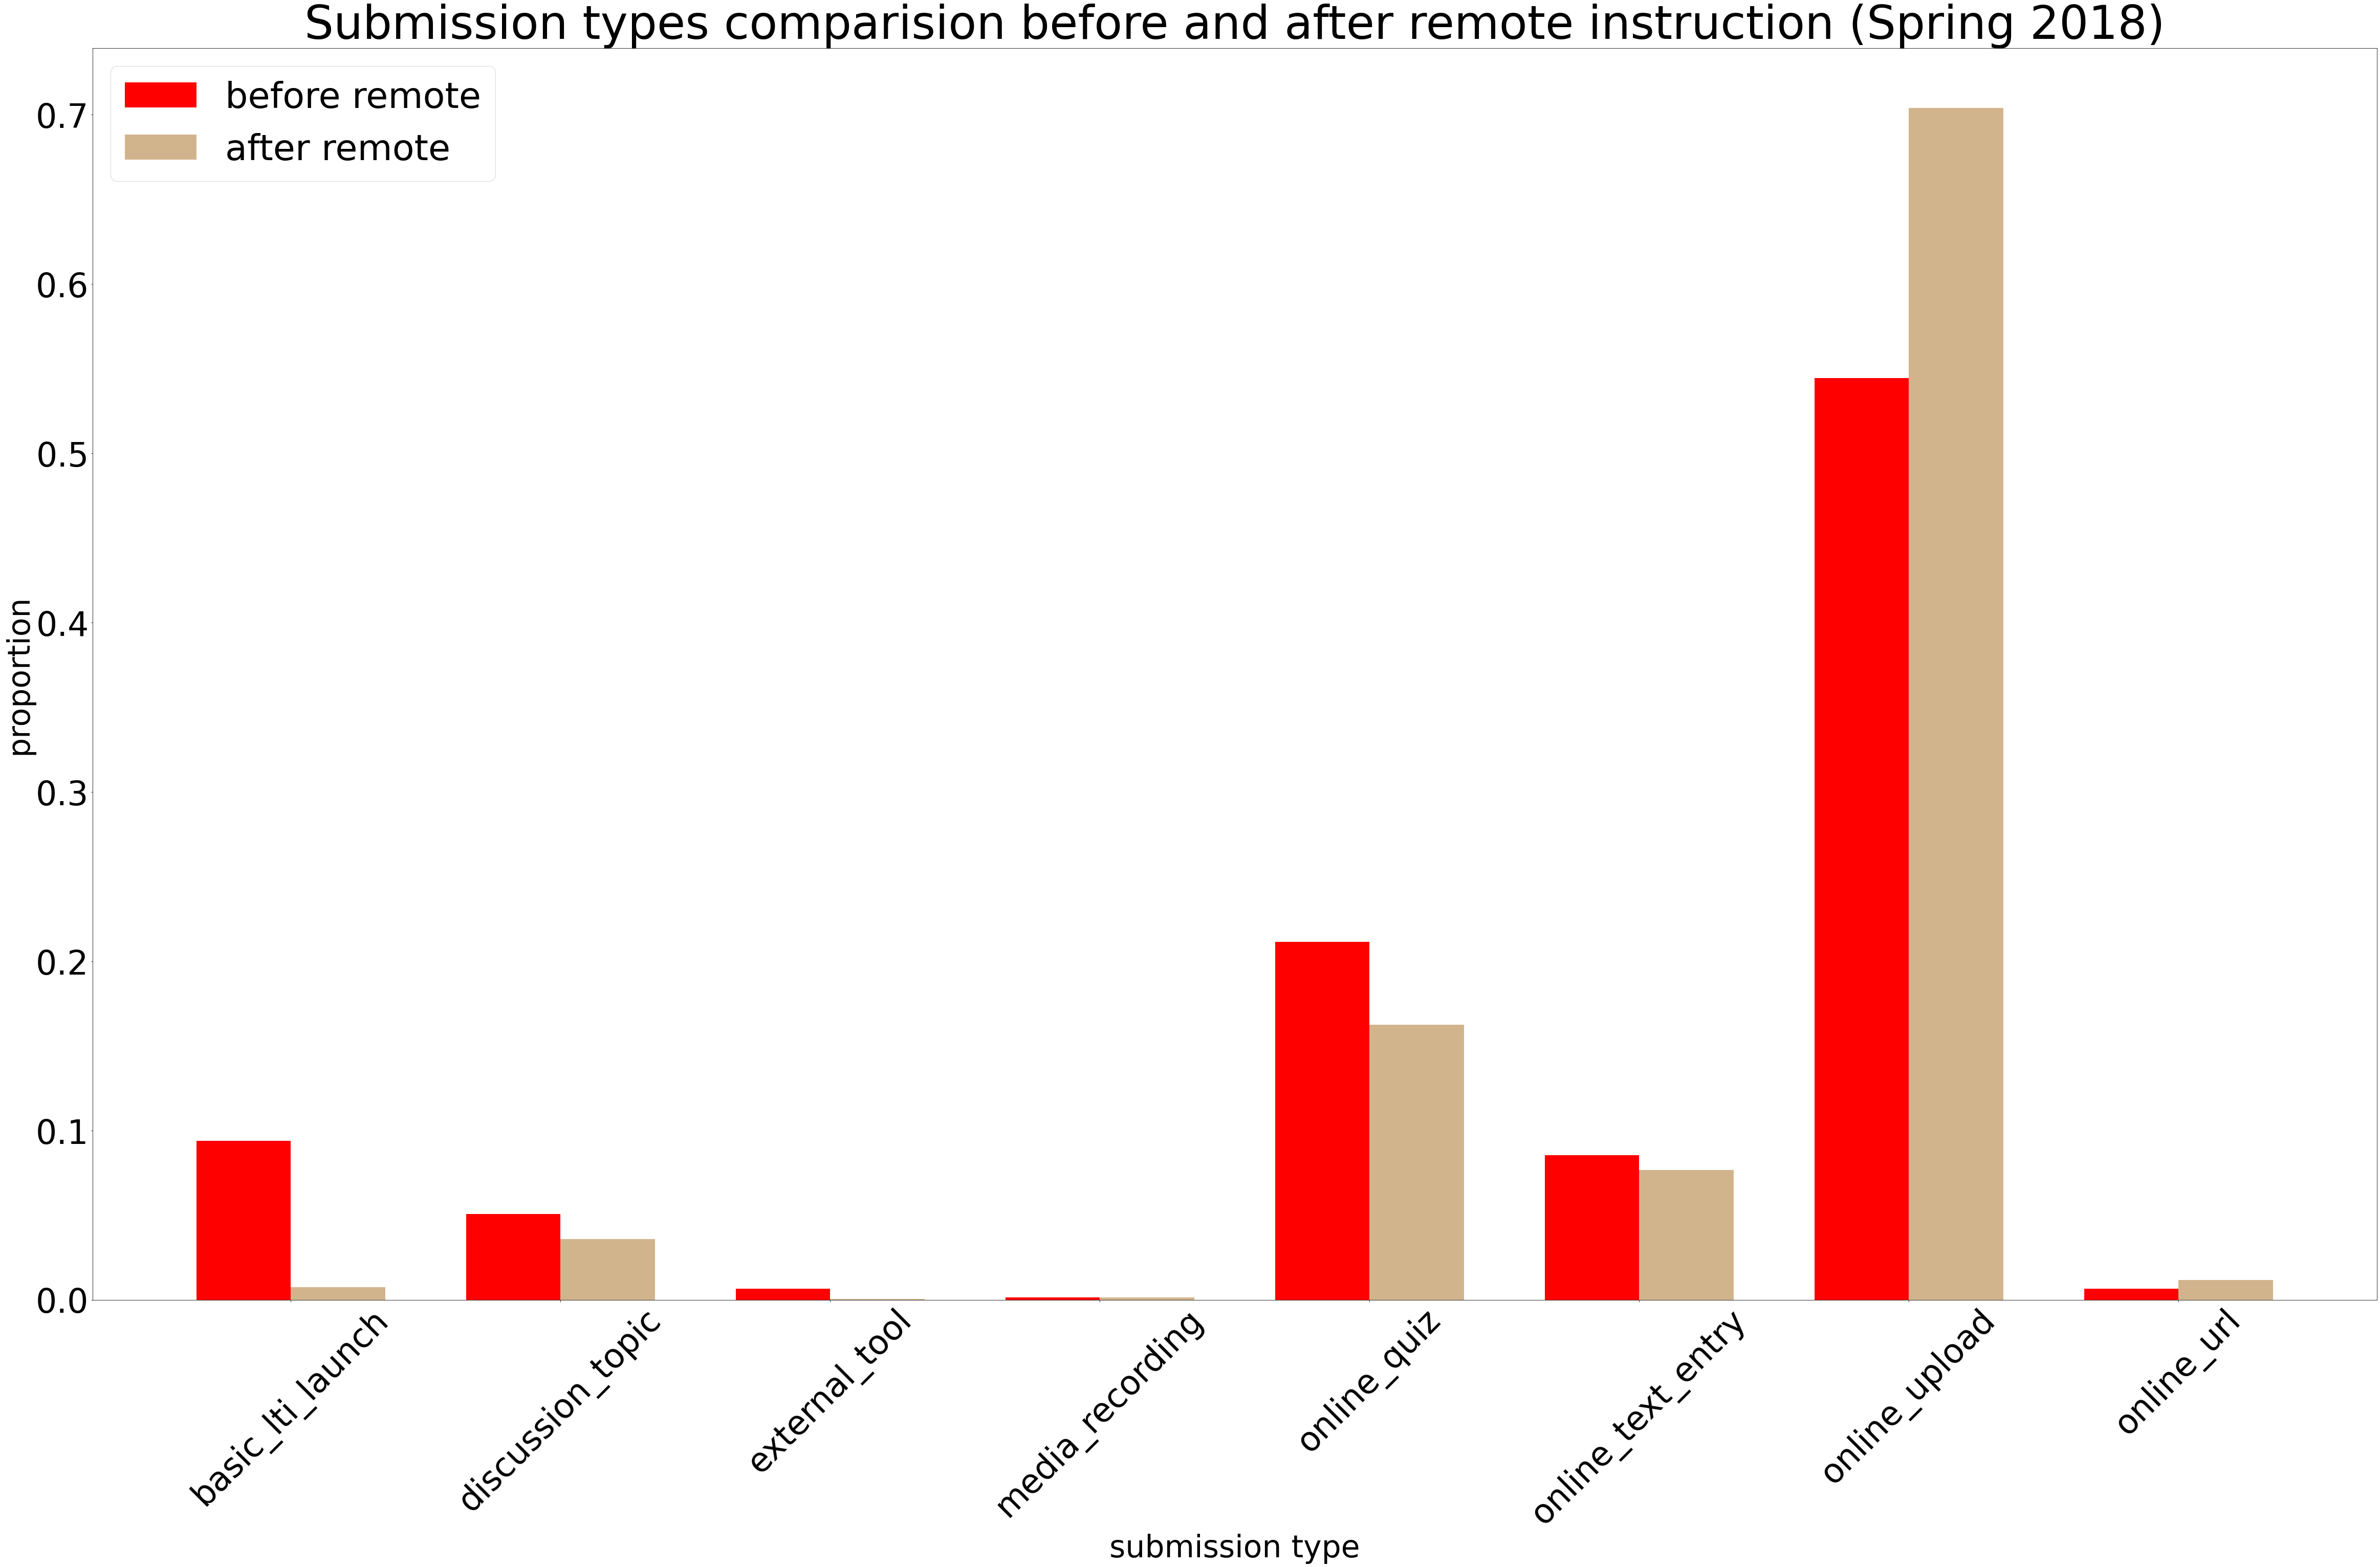

In [6]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
x = np.arange(len(types_before_18))  # the label locations
width = 0.35  # the width of the bars
before = ax.bar(x - width/2, types_before_18.tolist(), width, label='before remote', color='red')
rects2 = ax.bar(x + width/2, types_after_18.tolist(), width, label='after remote', color='tan')
ax.legend(prop={'size': 10})
ax.set_xticks(x)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 80
fig_size[1] = 45
ax.set_xticklabels(list(type_names_18))
plt.xticks(rotation=45, fontsize=65)
plt.yticks(fontsize=65)
plt.title('Submission types comparision before and after remote instruction (Spring 2018)', fontsize=90)
plt.xlabel('submission type', fontsize=60)
plt.ylabel('proportion', fontsize=60)
plt.legend(prop={'size': 70})
plt.show()

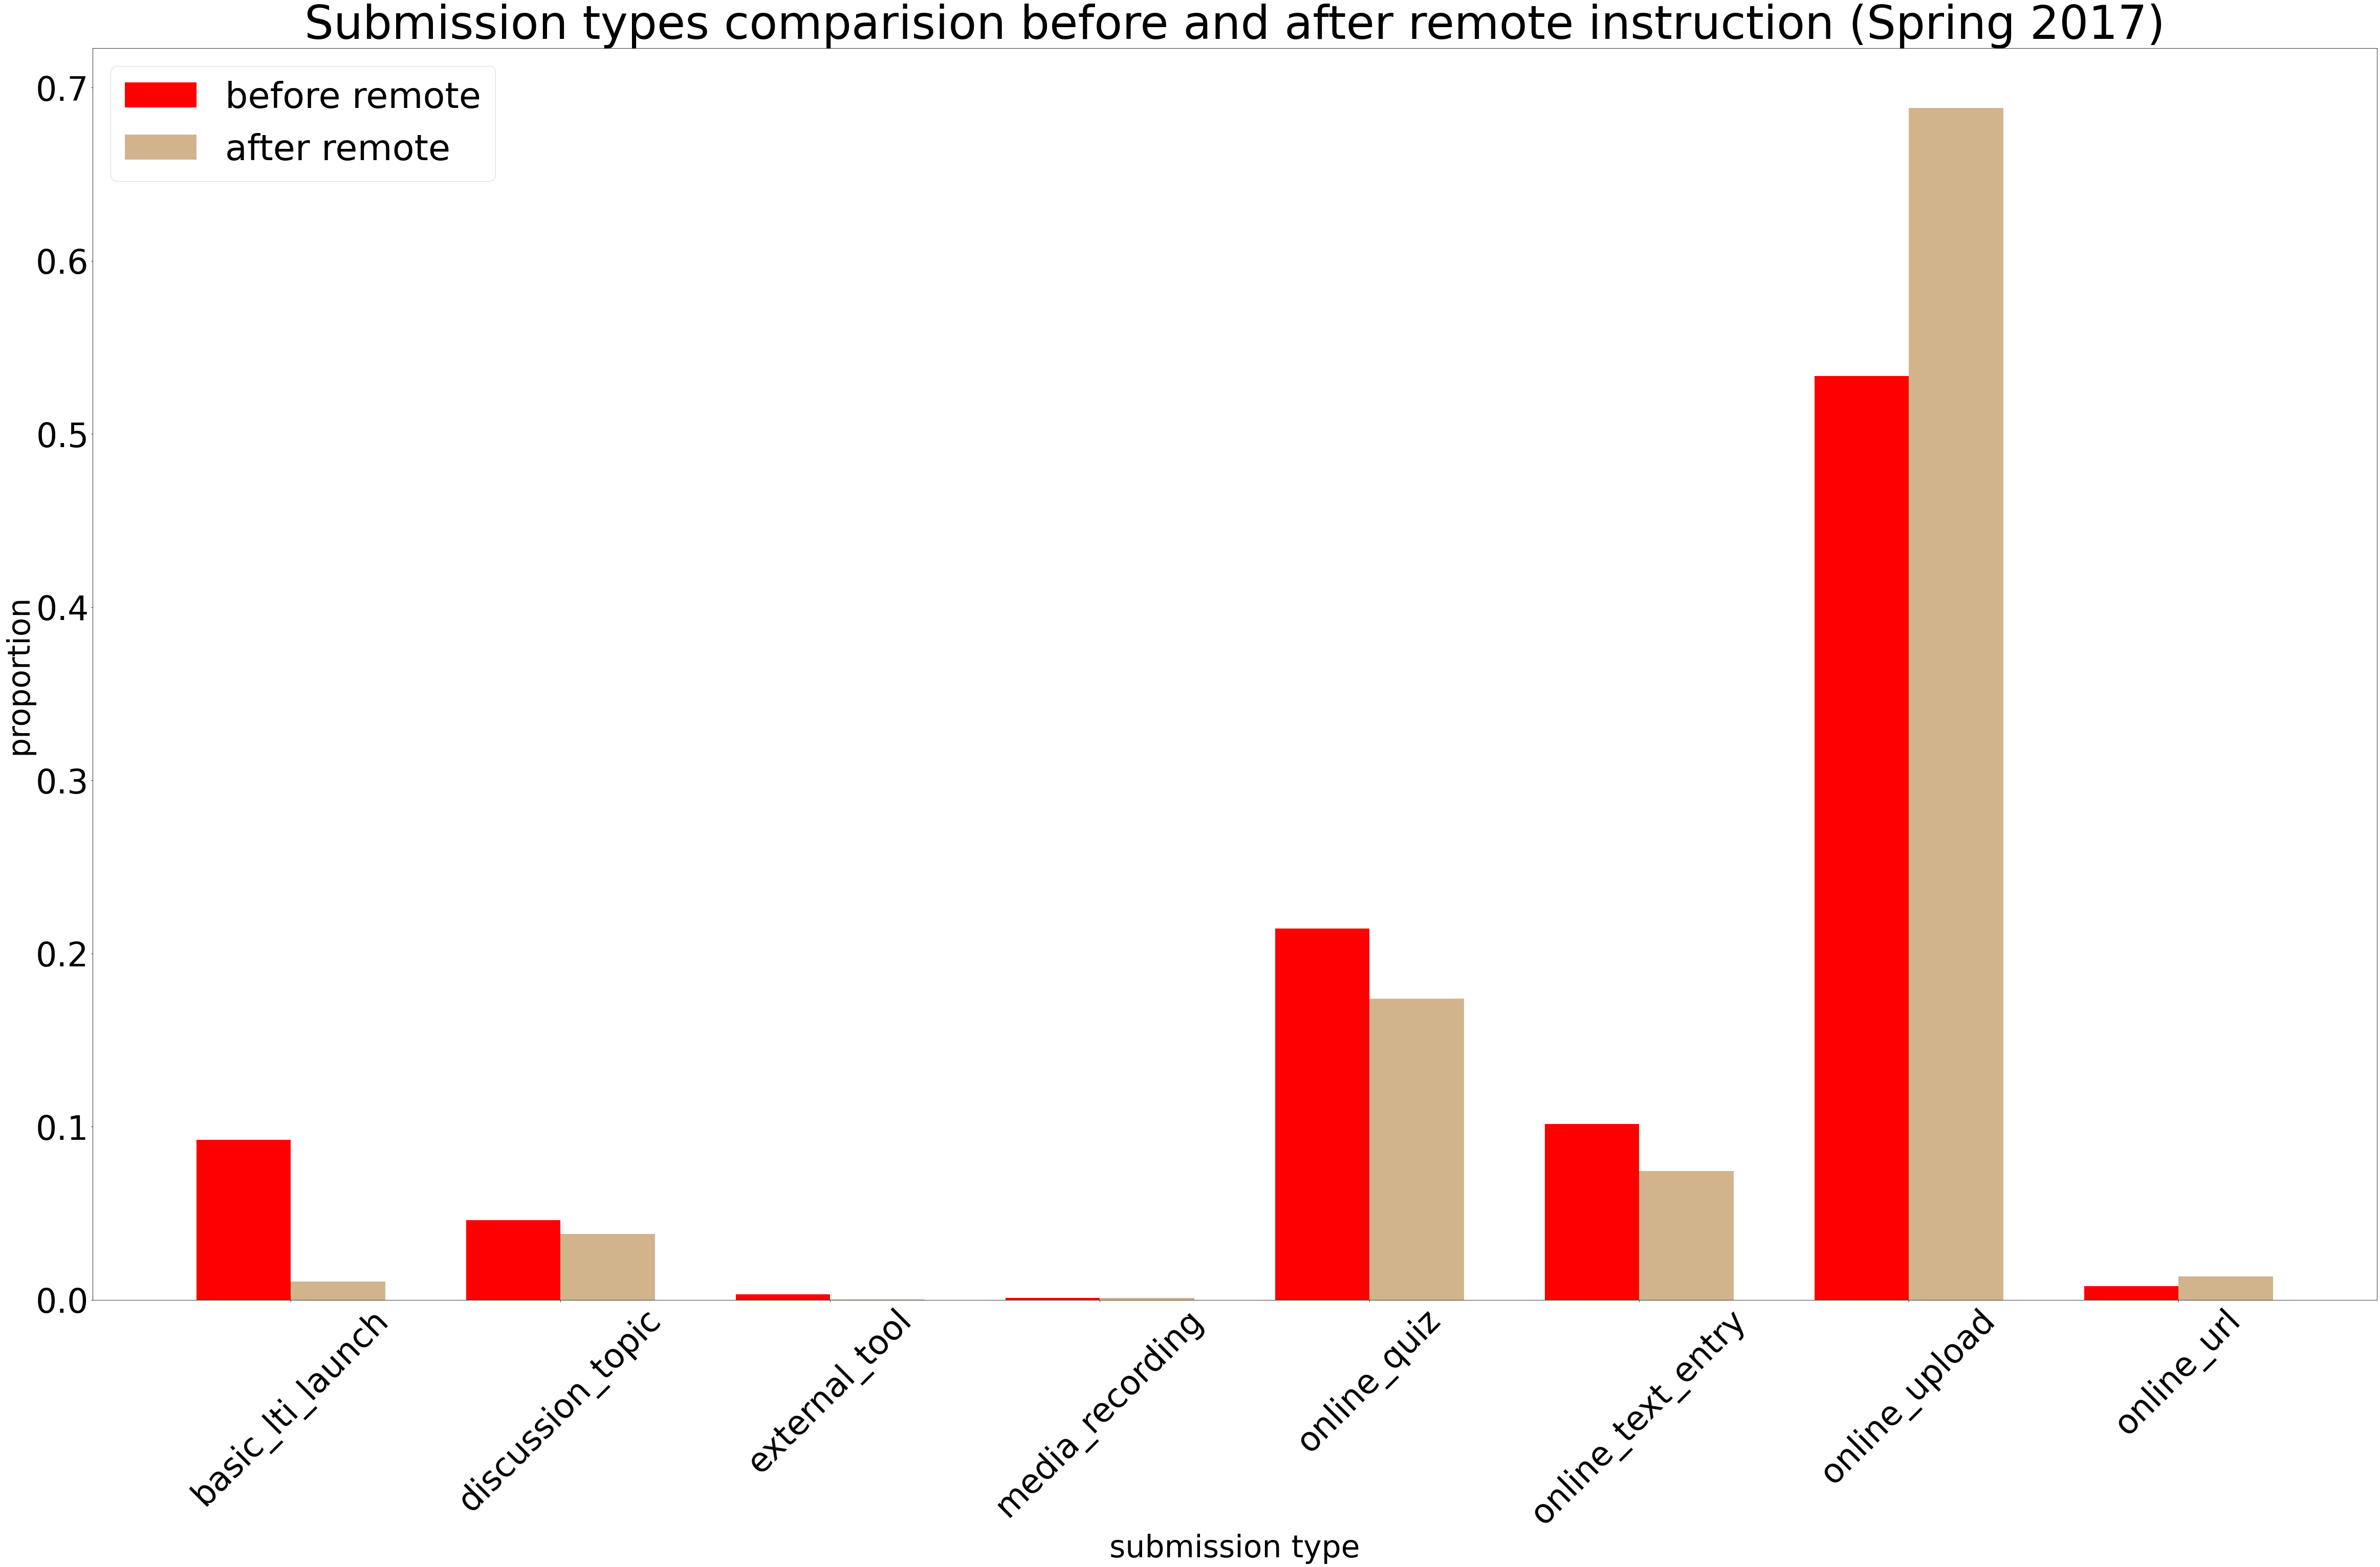

In [7]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
x = np.arange(len(types_before_17))  # the label locations
width = 0.35  # the width of the bars
before = ax.bar(x - width/2, types_before_17.tolist(), width, label='before remote', color='red')
rects2 = ax.bar(x + width/2, types_after_17.tolist(), width, label='after remote', color='tan')
ax.legend(prop={'size': 10})
ax.set_xticks(x)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 80
fig_size[1] = 45
ax.set_xticklabels(list(type_names_17))
plt.xticks(rotation=45, fontsize=65)
plt.yticks(fontsize=65)
plt.title('Submission types comparision before and after remote instruction (Spring 2017)', fontsize=90)
plt.xlabel('submission type', fontsize=60)
plt.ylabel('proportion', fontsize=60)
plt.legend(prop={'size': 70})
plt.show()